In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
import sklearn
from sklearn import metrics

In [ ]:
class DataExploration:
    
    train_data = pd.DataFrame()
    train_data_original = pd.DataFrame()
    input_data = pd.DataFrame()
    post_processing_answer = pd.DataFrame()
    
    def read_data(self):
        self.train_data = pd.read_csv('../FeatureEngineeringFiles/featured_train3.csv', encoding = "ISO-8859-1")
        self.train_data_original = pd.read_csv('../LematizedFiles/trainlem.csv', encoding = "ISO-8859-1")
        self.input_data = pd.read_csv('../InputFiles/check6.csv',encoding = "ISO-8859-1")
        self.post_processing_answer = pd.read_csv("../OutputFiles/submission.csv")

    
    def visualize_data(self):
        
        self.read_data()
        self.plot_freq()
        self.count_plot_isduplicate()
        self.plot_word_share_sqrt_distribution()
        self.plot_total_unique_words_distribution()
        self.plot_lem_word_share_sqrt_distribution()
        self.plot_log_word_share_distribution()
        self.plot_cat_plot_intersection_count()
        self.plot_cat_plot_length_difference()
        self.plot_cat_plot_total_unique_words()
        self.plot_max_importance_features()
        self.plot_anotted_correlation_matrix()
        self.plot_box_tfidf_word_match()
        self.plot_box_fuzz_partial_ratio()
        self.plot_box_fuzz_token_set_ratio()
        self.plot_box_intersection_count()
        self.swarm_plot_common_words_fuzz_qratio()
        self.box_plot_tfidf_word_match()
        self.swarm_plot_total_unique_words_word_count_ratio()
        self.plot_different_models_tried()
        self.plot_final_answer_scatter()
        self.confusion_matrix_heatmap()
        self.auc_curve()
    

    def plot_freq(self):
        
        #Plot for frequency of questions based on your id.
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
    
        
        questions = pd.Series(train_data_original['qid1'].tolist() + train_data_original['qid2'].tolist())

        plt.figure(figsize=(10,9))
        plt.hist(questions.value_counts(),bins=60)
        plt.yscale('log',nonposy='clip')
        plt.xlabel('Occurence of questions')
        plt.ylabel('Number of questions')
        plt.show()
    
    
    def plot_word_share_sqrt_distribution(self):
    
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
    
        questions = train_data ['word_share_sqrt']
        plt.hist(questions[train_data['is_duplicate']==0],bins=10,normed=True,label='NOT DUPLICATE')
        plt.hist(questions[train_data['is_duplicate']==1],bins=10,normed=True,label='DUPLICATE')
        plt.legend()
        plt.title("IS_DUPLICATE DISTRIBUTION ON WORD SHARE SQRT ANALYSIS")
        plt.show()
        
    def plot_total_unique_words_distribution(self):

        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer

        questions = train_data ['total_unique_words']
        plt.hist(questions[train_data['is_duplicate']==0],bins=10,normed=True,label='NOT DUPLICATE')
        plt.hist(questions[train_data['is_duplicate']==1],bins=10,normed=True,label='DUPLICATE')
        plt.legend()
        plt.title("IS_DUPLICATE DISTRIBUTION ON TOTAL UNIQUE WORDS ANALYSIS")
        plt.show()

    def plot_lem_word_share_sqrt_distribution(self):
        
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        questions = train_data ['lem_word_share_sqrt']
        plt.hist(questions[train_data['is_duplicate']==0],bins=10,normed=True,label='NOT DUPLICATE')
        plt.hist(questions[train_data['is_duplicate']==1],bins=10,normed=True,label='DUPLICATE')
        plt.legend()
        plt.title("IS_DUPLICATE DISTRIBUTION ON LEM WORD SHARE SQRT ANALYSIS")
        plt.show()
    
    def plot_log_word_share_distribution(self):
        
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        questions = train_data ['log_word_share']
        plt.hist(questions[train_data['is_duplicate']==0],bins=10,normed=True,label='NOT DUPLICATE')
        plt.hist(questions[train_data['is_duplicate']==1],bins=10,normed=True,label='DUPLICATE')
        plt.legend()
        plt.title("IS_DUPLICATE DISTRIBUTION ON LOG WORD SHARE ANALYSIS")
        plt.show()
    
    #Visualization that if the intersection count is more the probability of being 1 is more 
    def plot_cat_plot_intersection_count(self):
        
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        sns.set(style="ticks", color_codes=True)
        sns.catplot(y="intersection_count", x="is_duplicate", data = train_data);
        plt.show()
    
    #similar questions are mostly same in length 
    #so if the length difference is quite high then the most probable answer is not duplicate.
    def plot_cat_plot_length_difference(self):

        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        sns.set(style="ticks", color_codes=True)
        sns.catplot(y="length_difference", x="is_duplicate", data = train_data);
        plt.show()

    def plot_cat_plot_total_unique_words(self):
        
        
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        sns.catplot(x="is_duplicate", y="total_unique_words", data=train_data);
        plt.show()
    
    #clearly indicates that if the intersection count is high then the question is most likely to be a duplicate.
    def plot_cat_plot_common_words(self):

        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        sns.catplot(x="intersection_count", y="common_words", hue="is_duplicate",
                data=train_data);
        plt.show()
    
    def plot_cat_plot_common_words(self):
    
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer

        df = pd.DataFrame(train_data.iloc[:, 0:40], columns=train_data.iloc[:, 0:40].columns.values)
        train_data.dropna()
        y = train_data.iloc[0:5000, 40:41]
        forest = RFC(n_jobs=2,n_estimators=50)
        forest.fit(train_data.iloc[0:5000, 0:40], y)
        importances = forest.feature_importances_
        indices = np.argsort(importances)
        plt.figure(figsize=(12,12))
        plt.title('Feature Importances')
        plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        plt.yticks(range(len(indices)), df.columns.values[indices])
        plt.xlabel('Relative Importance')
        plt.show()

    
    #how two of the most important features relate to is_duplicate
    def plot_max_importance_features(self):

        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        sns.catplot(x="intersection_count", y="tfidf_word_match", hue="is_duplicate", kind="swarm", data=train_data.iloc[0:1000,:])
        plt.show()
    
    def plot_anotted_correlation_matrix(self):
        
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        corr = train_data.iloc[0:5000, 0:41].corr()
        corr.style.background_gradient()
        plt.show()

    
    #if the tfidf word match share is high clearly the is_duplicate column is more likely to be 1.
    def plot_box_tfidf_word_match(self):

        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        sns.catplot(x="is_duplicate", y="tfidf_word_match", kind="box", data=train_data);
        plt.show()
    
    #fuzzy features and their effect
    #quite balanced although still a lower value suggests more probability if is_duplicate being 0
    def plot_box_fuzz_partial_ratio(self):
        
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        sns.catplot(x="is_duplicate", y="fuzz_partial_ratio", kind="box", data=train_data);
        plt.show()

        
    #almost similar to the partial ratio but more refinement in terms of the set ratios
    def plot_box_fuzz_token_set_ratio(self):
        
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        sns.catplot(x="is_duplicate", y="fuzz_token_set_ratio", kind="box", data=train_data);
        plt.show()
    
    #intersection_count
    def plot_box_intersection_count(self):
        
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        sns.catplot(x="is_duplicate", y="intersection_count", kind="box", data=train_data);
    
    #suggests that there are more number of not is_duplicate answers in the training set than the is_duplicate answers.
    def count_plot_isduplicate(self):
        
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        sns.set(style="darkgrid")
        ax = sns.countplot(x="is_duplicate", data=train_data, palette="Set3")
        plt.show()

    #lower values of both common words and fuzz_qratio suggests that the answer is most likely to be not a duplicate,
    #however higher values does not suggest anything blatant.
    def swarm_plot_common_words_fuzz_qratio(self):
        
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        sns.catplot(x="common_words", y="fuzz_qratio", hue="is_duplicate", kind="swarm", data=train_data.iloc[0:1000,:])
        plt.show()
    
    #higher the value of tfidf_word_match more are the chances of it being duplicate.
    def box_plot_tfidf_word_match(self):

        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        sns.catplot(x="is_duplicate", y="tfidf_word_match", kind="box", data=train_data);
        plt.show()

    
    #Coagulation of both the values are around the center.
    def swarm_plot_total_unique_words_word_count_ratio(self):
        
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        sns.catplot(y="total_unique_words", x="word_count_ratio", hue="is_duplicate", kind="swarm", data=train_data.iloc[0:1000,:])
        plt.show()
    
    def plot_different_models_tried(self):
        
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        check6 = self.input_data
        
        sns.catplot(y="split50", x="is_duplicate", data=check6);
        sns.catplot(y="min_max", x="is_duplicate", data=check6);
        sns.catplot(y="split35", x="is_duplicate", data=check6);
        sns.catplot(y="split40", x="is_duplicate", data=check6);
        sns.catplot(y="min_max_split40", x="is_duplicate", data=check6);
        sns.catplot(y="split_50_40", x="is_duplicate", data=check6);
        sns.catplot(y="latest", x="is_duplicate", data=check6);
        sns.catplot(y="added_features", x="is_duplicate", data=check6);
        sns.catplot(y="added_features_split40", x="is_duplicate", data=check6);
        sns.catplot(y="blending", x="is_duplicate", data=check6);
        sns.catplot(y="logistic_blending", x="is_duplicate", data=check6);
        sns.catplot(y="blending_xgb_tuning", x="is_duplicate", data=check6);
        sns.catplot(y="question_count", x="is_duplicate", data=check6);
        sns.catplot(y="total_unique_words", x="is_duplicate", data=check6);
        sns.catplot(y="added_total_unique_words", x="is_duplicate", data=check6);
        sns.catplot(y="word_count_ratio", x="is_duplicate", data=check6);
        plt.show()
        
    
    #highly concentrated values towards the upper and lower end in validation data.
    def plot_final_answer_scatter(self):
        
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        finalgraphvalues = pd.DataFrame()
        finalgraphvalues["predicted_is_duplicate"] = post_processing_answer["is_duplicate"]
        finalgraphvalues["actual_is_duplicate"] = input_data["is_duplicate"]
        sns.catplot(x="actual_is_duplicate", y="predicted_is_duplicate", data=finalgraphvalues);
        plt.show()
        

    #confusion matrix keeping the threshold value as 0.56
    def confusion_matrix_heatmap(self):
        
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        finalgraphvalues = pd.DataFrame()
        finalgraphvalues = pd.DataFrame()
        finalgraphvalues["predicted_is_duplicate"] = post_processing_answer["is_duplicate"]
        finalgraphvalues["actual_is_duplicate"] = input_data["is_duplicate"]
        
        finalgraphvalues['prediction'] = np.where(finalgraphvalues["predicted_is_duplicate"]>=0.56, 1, 0)
        df = sklearn.metrics.confusion_matrix(finalgraphvalues["actual_is_duplicate"], finalgraphvalues["prediction"], labels=None, sample_weight=None)
        sns.set(font_scale=1.4)#for label size
        sns.heatmap(df, annot=True,annot_kws={"size": 16})# font size
        plt.show()
        

    def auc_curve(self):
        
        train_data = self.train_data
        train_data_original = self.train_data_original
        input_data = self.input_data
        post_processing_answer = self.post_processing_answer
        
        finalgraphvalues = pd.DataFrame()
        finalgraphvalues["predicted_is_duplicate"] = post_processing_answer["is_duplicate"]
        finalgraphvalues["actual_is_duplicate"] = input_data["is_duplicate"]
        
        
        fpr, tpr, _ = metrics.roc_curve(finalgraphvalues["actual_is_duplicate"],  finalgraphvalues["predicted_is_duplicate"])
        auc = metrics.roc_auc_score(finalgraphvalues["actual_is_duplicate"], finalgraphvalues["predicted_is_duplicate"])
        plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
        plt.legend(loc=4)
        plt.show()
        
        

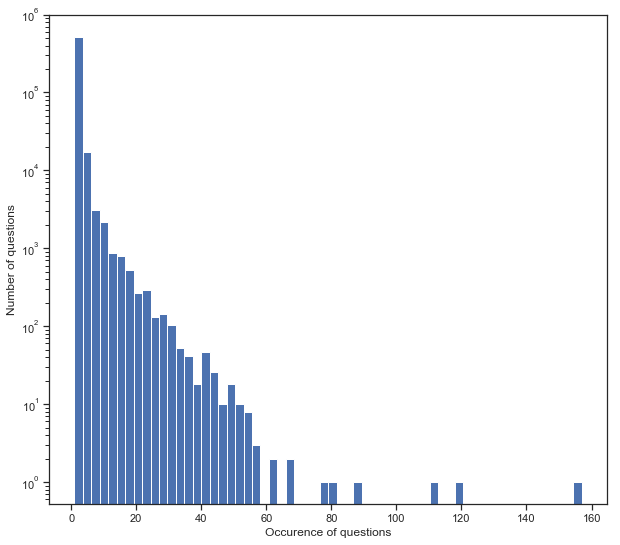

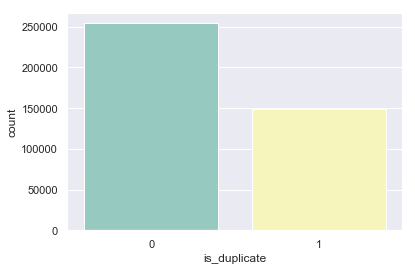

C:\Users\Gaurav Joshi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


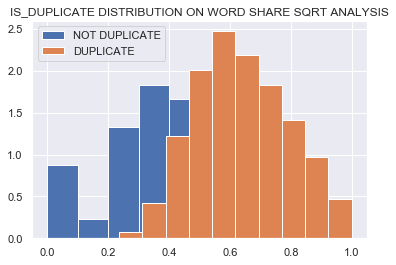

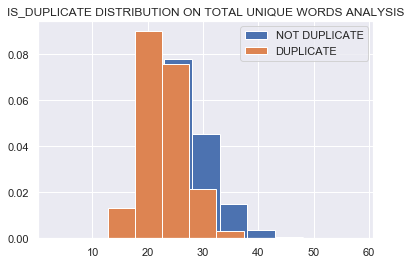

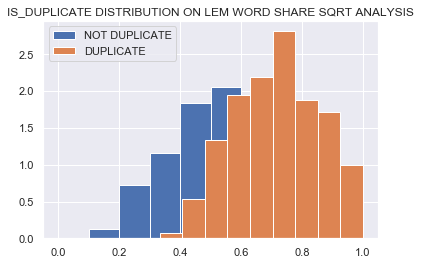

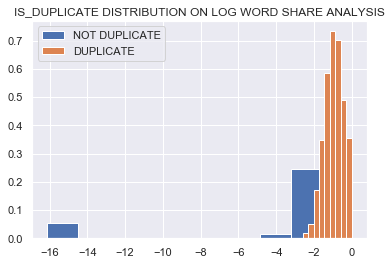

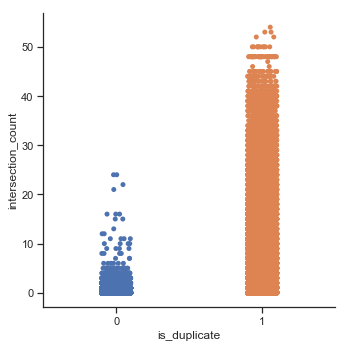

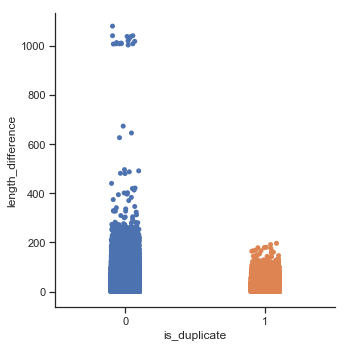

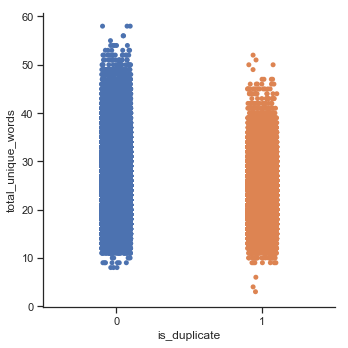

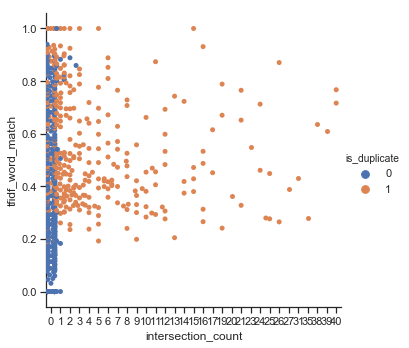

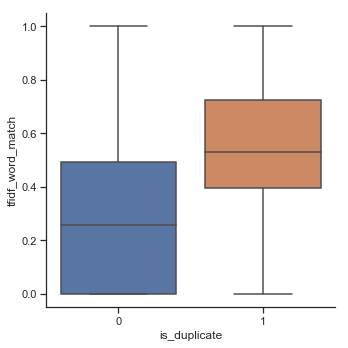

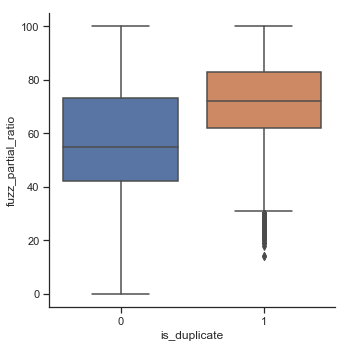

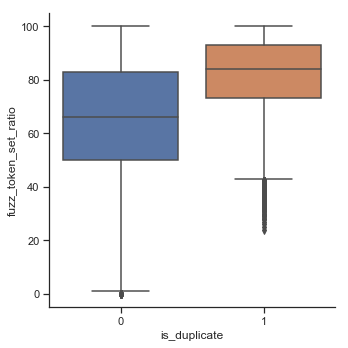

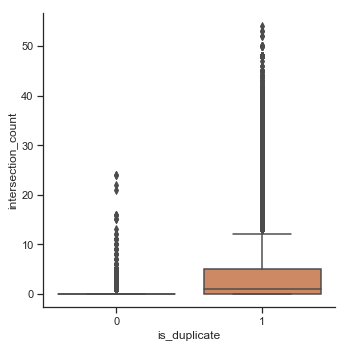

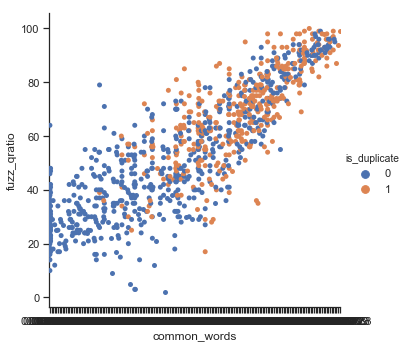

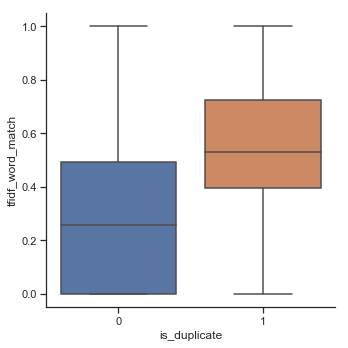

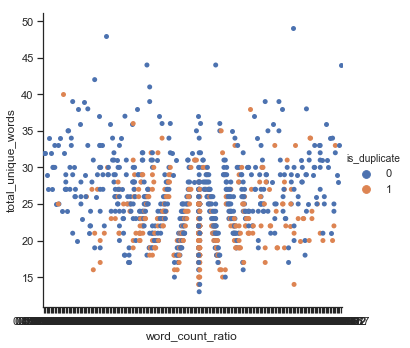

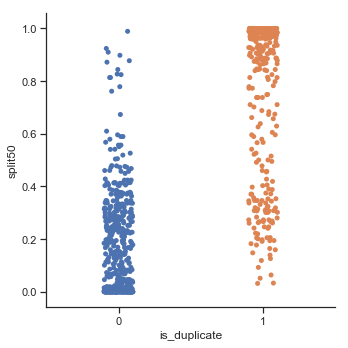

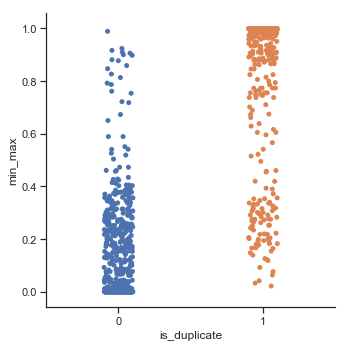

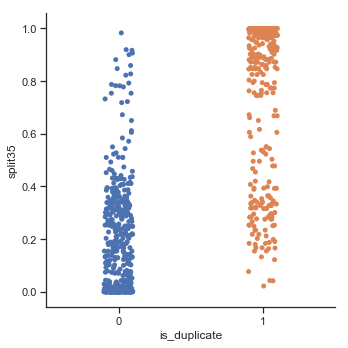

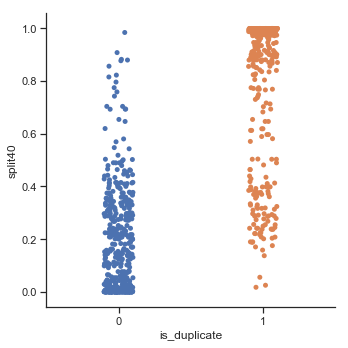

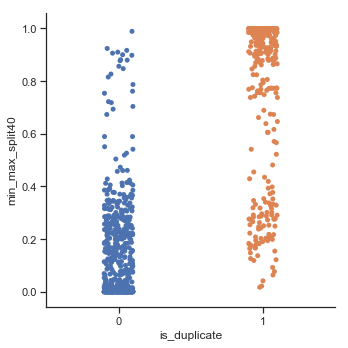

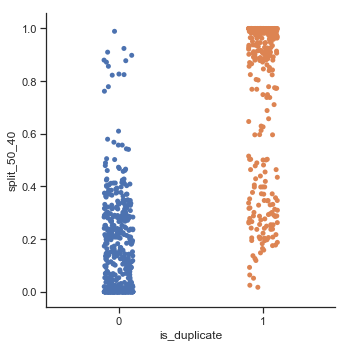

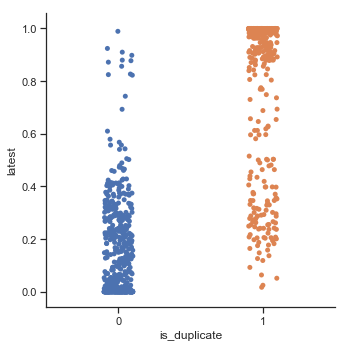

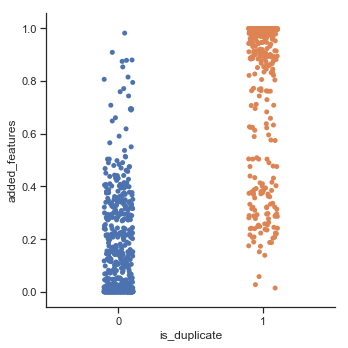

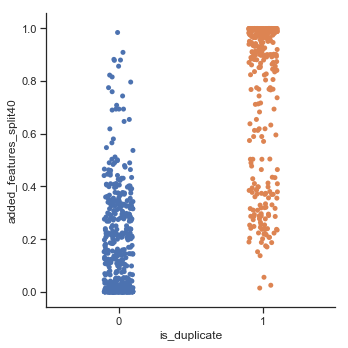

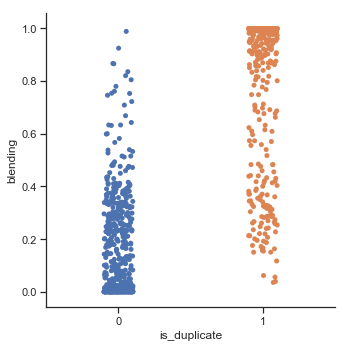

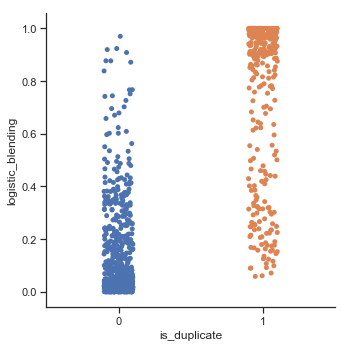

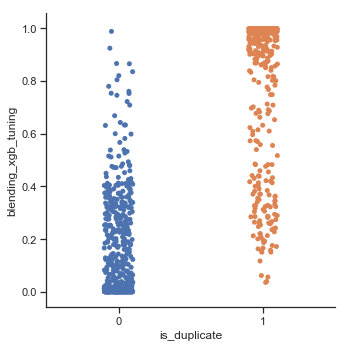

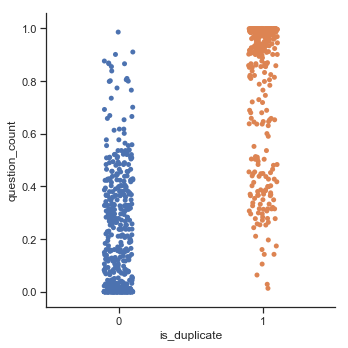

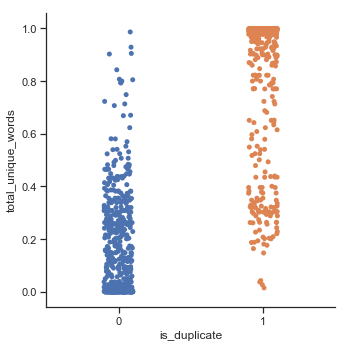

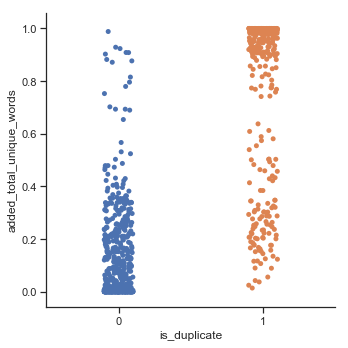

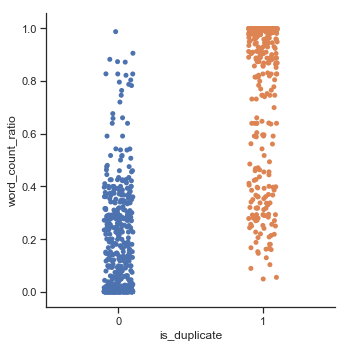

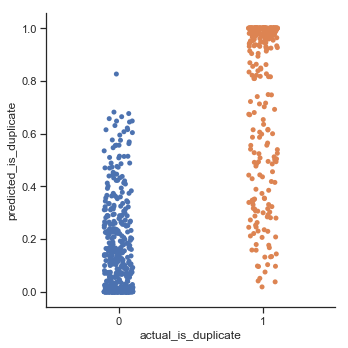

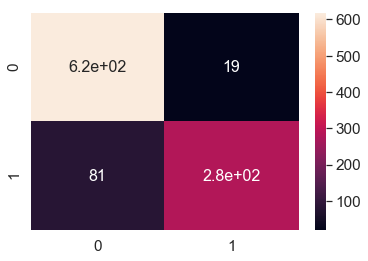

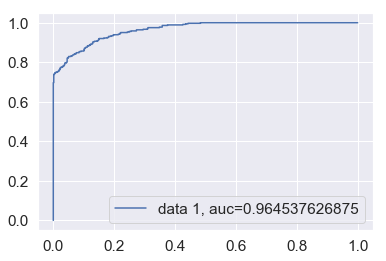

In [39]:
if __name__ == '__main__':
    
    obj = DataExploration()
    obj.read_data()
    obj.visualize_data()
    